# Lab 8

## TODO:

- [x] Split into training and test set (stratified)
- [x] Decision tree on dataset
- [ ] Add option to run on the smile dataset (optional for more consistent results)
- [ ] Make table (plot accuracy vs some hyperparams)
  - [ ] 10-fold CV
  - [ ] Accuracy
  - [ ] TP rate
  - [ ] FP rate
  - [ ] precision
  - [ ] recall
  - [ ] F measure
  - [ ] ROC area
  - [ ] Graph table
- [x] Random search hyperparameters
- [ ] 3 trees with different train/test sets (optional, exact details unclear)

## Notes:
- When doing k-fold validation make sure that the folds are stratified

## Imports 

In [23]:
# conda env create -f env.yaml 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os

## Data setup

In [24]:
np.random.seed(0)
os.environ["OMP_NUM_THREADS"] = "5"

df3 = pd.read_csv("Data/data3.csv")
df3

,failures,higher,studytime,Medu,Fedu,Dalc,age,reason_reputation,school,address,internet,G3
0,0,1,2,4,4,1,18,0,0,0,0,6
1,0,1,2,1,1,1,17,0,0,0,1,6
2,3,1,2,1,1,2,15,0,0,0,1,10
3,0,1,3,4,2,1,15,0,0,0,1,15
4,0,1,2,3,3,1,16,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,1,3,2,3,1,19,0,1,1,1,10
1040,0,1,2,3,1,1,18,0,1,0,1,16
1041,0,1,2,1,1,1,18,0,1,0,0,9
1042,0,1,1,3,1,3,17,0,1,0,1,10


In [25]:
df3_copy = df3.copy()
y = df3_copy.pop("G3")
y_binary = [0 if y_i > np.mean(y) else 1 for y_i in y] #making the target class into binary (over/under average score)
X = df3_copy
# display(X)
# print(y_binary)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, stratify=y_binary, random_state=42,)
X_train.shape

(835, 11)

Note: No need to scale, trees are not affected by different scales.

## Tree 1

In [27]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from scipy.stats import randint
from sklearn import tree

In [28]:
parameters = {"max_depth": [3, None],
              "max_features": randint(1, X.shape[1]),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

clf = tree.DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(clf, parameters, cv=10, random_state = 10)
tree_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018F1CAC23D0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018F1CAB3760>},
                   random_state=10)

[Text(0.6862571022727273, 0.9615384615384616, 'X[3] <= 3.5\nentropy = 1.0\nsamples = 835\nvalue = [408, 427]'),
 Text(0.51796875, 0.8846153846153846, 'X[0] <= 0.5\nentropy = 0.983\nsamples = 591\nvalue = [250, 341]'),
 Text(0.39957386363636366, 0.8076923076923077, 'X[8] <= 0.5\nentropy = 0.999\nsamples = 451\nvalue = [235, 216]'),
 Text(0.2832386363636364, 0.7307692307692307, 'X[2] <= 2.5\nentropy = 0.99\nsamples = 334\nvalue = [187, 147]'),
 Text(0.18920454545454546, 0.6538461538461539, 'X[9] <= 0.5\nentropy = 0.999\nsamples = 249\nvalue = [129, 120]'),
 Text(0.0875, 0.5769230769230769, 'X[3] <= 1.5\nentropy = 0.992\nsamples = 206\nvalue = [114, 92]'),
 Text(0.01818181818181818, 0.5, 'X[10] <= 0.5\nentropy = 0.965\nsamples = 41\nvalue = [16, 25]'),
 Text(0.00909090909090909, 0.4230769230769231, 'entropy = 0.811\nsamples = 8\nvalue = [2, 6]'),
 Text(0.02727272727272727, 0.4230769230769231, 'X[6] <= 15.5\nentropy = 0.983\nsamples = 33\nvalue = [14, 19]'),
 Text(0.01818181818181818, 0.34

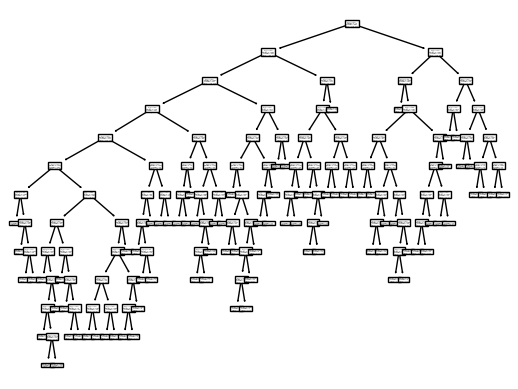

In [29]:
#takes a few seconds and hard to see but just for sanity check
tree.plot_tree(tree_cv.best_estimator_)

## Evaluation

### Training results

In [30]:
print("Best Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 7}
Best score is 0.6633820998278829


In [31]:
tree_cv.cv_results_

{'mean_fit_time': array([0.0023736 , 0.00216804, 0.00168316, 0.00223577, 0.00162463,
        0.00214052, 0.00160637, 0.001441  , 0.00232534, 0.00205715]),
 'std_fit_time': array([0.00409092, 0.00266875, 0.00187148, 0.00306246, 0.00335187,
        0.00208862, 0.00215306, 0.00039502, 0.00168282, 0.00222346]),
 'mean_score_time': array([0.00121033, 0.0010807 , 0.00099142, 0.00087941, 0.000102  ,
        0.00134404, 0.00146654, 0.00115526, 0.00116389, 0.00147736]),
 'std_score_time': array([0.00219459, 0.00164439, 0.00248625, 0.00123074, 0.00030599,
        0.00194265, 0.00214517, 0.0001845 , 0.00211488, 0.00174285]),
 'param_criterion': masked_array(data=['entropy', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'entropy', 'gini', 'gini', 'entropy'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[None, None, None, None, 3, 

In [32]:
print(f"Mean test scores: ", tree_cv.cv_results_["mean_test_score"])

Mean test scores:  [0.65015777 0.63944349 0.60593804 0.62629088 0.62032415 0.63109581
 0.62020941 0.60840505 0.61781411 0.6633821 ]


#### Test set results

In [36]:
#cross validation

CV_test = cross_val_score(tree_cv, X_test, y_test, cv=10)
print(CV_test)
print("Mean test accuracy: ",np.mean(CV_test))

[0.42857143 0.61904762 0.52380952 0.66666667 0.57142857 0.57142857
 0.61904762 0.57142857 0.52380952 0.7       ]
Mean test accuracy:  0.5795238095238096


In [34]:
#overall test
print("Training accuracy: ",tree_cv.score(X_train, y_train))
print("Test accuracy: ", tree_cv.score(X_test, y_test))

Training accuracy:  0.7365269461077845
Test accuracy:  0.6220095693779905


## Tree 2

TODO

## Tree 3

TODO